In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
import numpy as np
import keras

Using TensorFlow backend.


In [0]:
from keras.datasets import mnist

(train_X, train_y), (test_X, test_y) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
train_X.shape

(60000, 28, 28)

In [0]:
from keras.utils import to_categorical

train_X = train_X.reshape((train_X.shape[0], 28, 28, 1)) / 255
test_X = test_X.reshape((test_X.shape[0], 28, 28, 1)) / 255
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten
from keras.callbacks import EarlyStopping

In [0]:
model = Sequential()

In [0]:
# 入力画像 28x28x1 (縦の画素数)x(横の画素数)x(チャンネル数)
# 28x28x1 -> 24x24x16
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu',
                 kernel_initializer='he_normal', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))  # 24x24x16 -> 12x12x16
model.add(Conv2D(64, kernel_size=(5, 5), activation='relu',
                 kernel_initializer='he_normal'))  # 12x12x16 -> 8x8x64
model.add(MaxPooling2D(pool_size=(2, 2)))  # 8x8x64 -> 4x4x64

model.add(Flatten())  # 4x4x64-> 1024
model.add(Dense(10, activation='softmax'))  # 1024 -> 10

In [0]:
model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer='adam',
    metrics=['accuracy']
)

In [0]:
early_stopping = EarlyStopping(patience=1, verbose=1)
model.fit(x=train_X, y=train_y, batch_size=128, epochs=10, verbose=1,
          validation_data=(test_X, test_y), callbacks=[early_stopping])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 104us/step - loss: 0.2311 - acc: 0.9324 - val_loss: 0.0759 - val_acc: 0.9770
Epoch 2/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.0602 - acc: 0.9822 - val_loss: 0.0462 - val_acc: 0.9855
Epoch 3/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.0426 - acc: 0.9874 - val_loss: 0.0357 - val_acc: 0.9887
Epoch 4/10
21120/60000 [=========>....................] - ETA: 3s - loss: 0.0314 - acc: 0.9900

60000/60000 [==============================] - 5s 90us/step - loss: 0.0345 - acc: 0.9894 - val_loss: 0.0380 - val_acc: 0.9866
Epoch 00004: early stopping


In [0]:
score = model.evaluate(test_X, test_y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03800458292979747
Test accuracy: 0.9866


In [0]:
%matplotlib inline

import os

import keras
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Input, Activation, add, Add, Dropout
from keras.callbacks import EarlyStopping
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential, Model
from keras.datasets import cifar10
#from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

random_state = 42

In [0]:
# サンプル画像 (5x5)
sample_image = np.array([[1, 1, 1, 0, 0],
                         [0, 1, 1, 1, 0],
                         [0, 0, 1, 1, 1],
                         [0, 0, 1, 1, 0],
                         [0, 1, 1, 0, 0]]
                        ).astype('float32').reshape(1, 5, 5, 1)

# フィルタ
W = np.array([[1, 0, 1],
              [0, 1, 0],
              [1, 0, 1]]).astype('float32').reshape(3, 3, 1, 1)

model = Sequential()

model.add(Conv2D(1, kernel_size=(3, 3), strides=(1, 1),
                 padding='valid', input_shape=(5, 5, 1), use_bias=False))
model.layers[0].set_weights([W])

model.predict(sample_image).reshape(3, 3)

array([[4., 3., 4.],
       [2., 4., 3.],
       [2., 3., 4.]], dtype=float32)

In [0]:
# サンプル画像
sample_image = np.array([[1, 1, 2, 4],
                         [5, 6, 7, 8],
                         [3, 2, 1, 0],
                         [1, 2, 3, 4]]
                        ).astype("float32").reshape(1, 4, 4, 1)

model = Sequential()

model.add(MaxPooling2D(pool_size=(2, 2), strides=None,
                       padding='valid', input_shape=(4, 4, 1)))

model.predict(sample_image).reshape(2, 2)

array([[6., 8.],
       [3., 4.]], dtype=float32)

In [0]:
#fasion MNIST
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 6s 1us/step


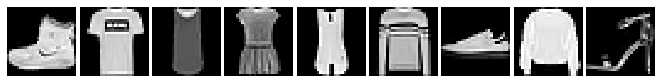

In [0]:
fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05,
                    wspace=0.05)

for i in range(9):
    ax = fig.add_subplot(1, 9, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i], cmap='gray')

In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)) / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)) / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [0]:
model = Sequential()

# 入力画像 28x28x1 (縦の画素数)x(横の画素数)x(チャンネル数)
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu',
                 kernel_initializer='he_normal', input_shape=(28, 28, 1)))  # 28x28x1 -> 24x24x16
model.add(MaxPooling2D(pool_size=(2, 2)))  # 24x24x16 -> 12x12x16
model.add(Conv2D(64, kernel_size=(5, 5), activation='relu',
                 kernel_initializer='he_normal'))  # 12x12x16 -> 8x8x64
model.add(MaxPooling2D(pool_size=(2, 2)))  # 8x8x64 -> 4x4x64

model.add(Flatten())  # 4x4x64-> 1024
model.add(Dense(10, activation='softmax'))  # 1024 -> 10

model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer='adam',
    metrics=['accuracy']
)

NameError: ignored

In [0]:
early_stopping = EarlyStopping(patience=1, verbose=1)
model.fit(x=x_train, y=y_train, batch_size=128, epochs=100, verbose=1,
          validation_data=(x_test, y_test), callbacks=[early_stopping])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 48s 797us/step - loss: 0.5473 - acc: 0.8070 - val_loss: 0.4167 - val_acc: 0.8524
Epoch 2/100
13184/60000 [=====>........................] - ETA: 35s - loss: 0.3793 - acc: 0.8648

60000/60000 [==============================] - 48s 802us/step - loss: 0.3537 - acc: 0.8740 - val_loss: 0.3547 - val_acc: 0.8711
Epoch 3/100
39168/60000 [==================>...........] - ETA: 15s - loss: 0.3103 - acc: 0.8907

60000/60000 [==============================] - 48s 798us/step - loss: 0.3092 - acc: 0.8897 - val_loss: 0.3188 - val_acc: 0.8866
Epoch 4/100
49280/60000 [=======================>......] - ETA: 8s - loss: 0.2819 - acc: 0.8976

60000/60000 [==============================] - 48s 797us/step - loss: 0.2813 - acc: 0.8981 - val_loss: 0.3111 - val_acc: 0.8893
Epoch 5/100
52864/60000 [=========================>....] - ETA: 5s - loss: 0.2596 - acc: 0.9068

60000/60000 [==============================] - 48s 797us/step - loss: 0.2596 - acc: 0.9069 - val_loss: 0.2999 - val_acc: 0.8921
Epoch 6/100
54272/60000 [==========================>...] - ETA: 4s - loss: 0.2444 - acc: 0.9113

60000/60000 [==============================] - 47s 791us/step - loss: 0.2415 - acc: 0.9126 - val_loss: 0.2831 - val_acc: 0.8969
Epoch 7/100
54912/60000 [==========================>...] - ETA: 3s - loss: 0.2280 - acc: 0.9168

60000/60000 [==============================] - 47s 782us/step - loss: 0.2276 - acc: 0.9173 - val_loss: 0.2851 - val_acc: 0.9022
Epoch 00007: early stopping


# CIFAR-10

In [0]:
from keras.datasets import cifar10

from sklearn.model_selection import train_test_split
from keras.layers.normalization import BatchNormalization

random_state = 42

In [0]:
(cifar_X_1, cifar_y_1), (cifar_X_2, cifar_y_2) = cifar10.load_data()

cifar_X = np.r_[cifar_X_1, cifar_X_2]
cifar_y = np.r_[cifar_y_1, cifar_y_2]

cifar_X = cifar_X.astype('float32') / 255
cifar_y = np.eye(10)[cifar_y.astype('int32').flatten()]

train_X, test_X, train_y, test_y = train_test_split(
    cifar_X, cifar_y, test_size=10000, random_state=random_state)
train_X, valid_X, train_y, valid_y = train_test_split(
    train_X, train_y, test_size=10000, random_state=random_state)

170500096/170498071 [==============================] - 24s 0us/step


In [0]:
cifar_X_1.shape

(50000, 32, 32, 3)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

from keras.preprocessing.image import ImageDataGenerator

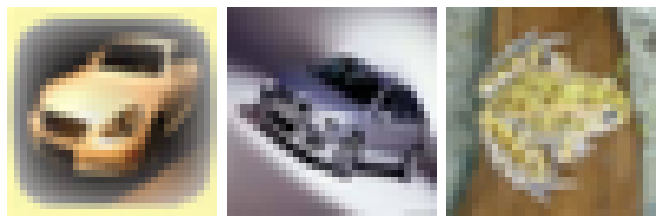

In [0]:
fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05,
                    wspace=0.05)

for i in range(3):
    ax = fig.add_subplot(1, 3, i + 1, xticks=[], yticks=[])
    ax.imshow(train_X[i])

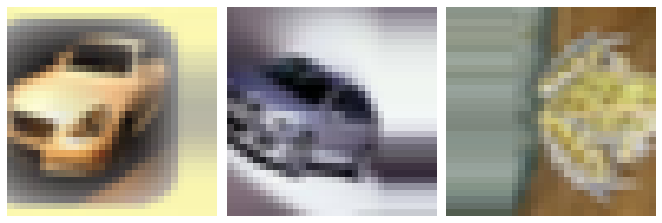

In [0]:
# 左右にずらす
datagen = ImageDataGenerator(width_shift_range=0.4)

datagen.fit(train_X)

fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0,
                    top=0.5, hspace=0.05, wspace=0.05)

for batch_X, batch_y in datagen.flow(train_X, train_y, batch_size=9, shuffle=False):
    for i in range(3):
        ax = fig.add_subplot(1, 3, i + 1, xticks=[], yticks=[])
        ax.imshow(batch_X[i])
    break

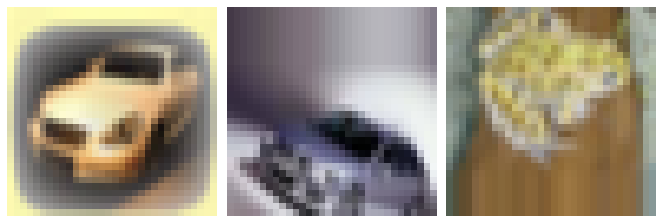

In [0]:
# 上下にずらす
datagen = ImageDataGenerator(height_shift_range=0.4)

datagen.fit(train_X)

fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0,
                    top=0.5, hspace=0.05, wspace=0.05)

for batch_X, batch_y in datagen.flow(train_X, train_y, batch_size=9, shuffle=False):
    for i in range(3):
        ax = fig.add_subplot(1, 3, i + 1, xticks=[], yticks=[])
        ax.imshow(batch_X[i])
    break

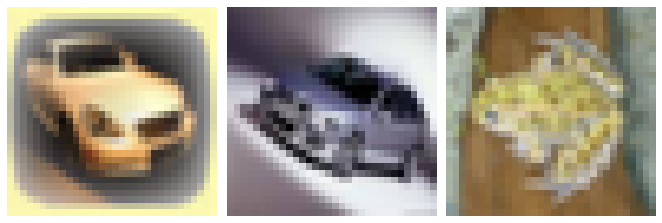

In [0]:
# 左右反転
datagen = ImageDataGenerator(horizontal_flip=True)

datagen.fit(train_X)

fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0,
                    top=0.5, hspace=0.05, wspace=0.05)

for batch_X, batch_y in datagen.flow(train_X, train_y, batch_size=3, shuffle=False):
    for i in range(3):
        ax = fig.add_subplot(1, 3, i + 1, xticks=[], yticks=[])
        ax.imshow(batch_X[i])
    break

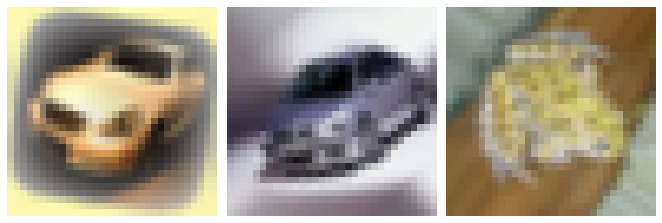

In [0]:
# 回転
datagen = ImageDataGenerator(rotation_range=45)

datagen.fit(train_X)

fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0,
                    top=0.5, hspace=0.05, wspace=0.05)

for batch_X, batch_y in datagen.flow(train_X, train_y, batch_size=3, shuffle=False):
    for i in range(3):
        ax = fig.add_subplot(1, 3, i + 1, xticks=[], yticks=[])
        ax.imshow(batch_X[i])
    break

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.callbacks import EarlyStopping

In [0]:
from kears.layers.normalization import BatchNormalization

# ・・・
model.add(BatchNormalization())
# ・・・

In [0]:
model = Sequential()

# 32x32x3 -> 28x28x6
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu',
                 kernel_initializer='he_normal', input_shape=(32, 32, 3)))  
model.add(MaxPooling2D(pool_size=(2, 2)))  # 28x28x6 -> 14x14x6
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu',
                 kernel_initializer='he_normal'))  # 14x14x6 -> 10x10x16
model.add(MaxPooling2D(pool_size=(2, 2)))  # 10x10x16 -> 5x5x16

model.add(Flatten())  # 5x5x16 -> 400
model.add(Dense(120, activation='relu',
                kernel_initializer='he_normal'))  # 400 ->120
# 120 ->84
model.add(Dense(84, activation='relu', kernel_initializer='he_normal'))  
model.add(Dense(10, activation='softmax'))  # 84 ->10

In [0]:
model = Sequential()

# 32x32x3 -> 30x30x64
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',
                 kernel_initializer='he_normal', input_shape=(32, 32, 3)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',
                 kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))  # 28x28x64 -> 14x14x64
model.add(Dropout(0.5))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',
                 kernel_initializer='he_normal'))  # 14x14x64 -> 12x12x128
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',
                 kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))  # 12x12x128 -> 5x5x128
model.add(Dropout(0.5))

model.add(Flatten())  # 5x5x16 -> 400
model.add(Dense(120, activation='relu',
                kernel_initializer='he_normal'))  # 400 ->120
# 120 ->84
model.add(Dense(84, activation='relu', kernel_initializer='he_normal'))  
model.add(Dense(10, activation='softmax'))  # 84 ->10

In [0]:
model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer='adam',
    metrics=['accuracy']
)

In [0]:
early_stopping = EarlyStopping(patience=1, verbose=1)
model.fit(x=train_X, y=train_y, batch_size=128, epochs=10, verbose=1,
          validation_data=(valid_X, valid_y), callbacks=[early_stopping])

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 15s 381us/step - loss: 1.8133 - acc: 0.3283 - val_loss: 1.4183 - val_acc: 0.4786
Epoch 2/10
40000/40000 [==============================] - 14s 340us/step - loss: 1.3449 - acc: 0.5115 - val_loss: 1.1946 - val_acc: 0.5694
Epoch 3/10
19072/40000 [=============>................] - ETA: 6s - loss: 1.2010 - acc: 0.5741

40000/40000 [==============================] - 14s 339us/step - loss: 1.1586 - acc: 0.5886 - val_loss: 1.0307 - val_acc: 0.6355
Epoch 4/10
40000/40000 [==============================] - 13s 336us/step - loss: 1.0373 - acc: 0.6308 - val_loss: 0.9226 - val_acc: 0.6723
Epoch 5/10
40000/40000 [==============================] - 13s 337us/step - loss: 0.9626 - acc: 0.6576 - val_loss: 0.9206 - val_acc: 0.6797
Epoch 6/10
  384/40000 [..............................] - ETA: 13s - loss: 0.8255 - acc: 0.7031

40000/40000 [==============================] - 13s 337us/step - loss: 0.8823 - acc: 0.6885 - val_loss: 0.8127 - val_acc: 0.7132
Epoch 7/10
40000/40000 [==============================] - 13s 336us/step - loss: 0.8373 - acc: 0.7027 - val_loss: 0.7980 - val_acc: 0.7213
Epoch 8/10
36736/40000 [==========================>...] - ETA: 1s - loss: 0.8010 - acc: 0.7167

40000/40000 [==============================] - 14s 338us/step - loss: 0.8020 - acc: 0.7158 - val_loss: 0.7243 - val_acc: 0.7493
Epoch 9/10
40000/40000 [==============================] - 13s 337us/step - loss: 0.7554 - acc: 0.7349 - val_loss: 0.7329 - val_acc: 0.7411
Epoch 00009: early stopping


In [0]:
score = model.evaluate(test_X, test_y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7837513171195983
Test accuracy: 0.7262


In [0]:
model.save_weights('cifar10-cnn-weights.h5')

In [0]:
from google.colab import files
uploaded = files.upload()

Saving test-car.jpg to test-car.jpg


In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [0]:
labels = ["airplane", "automobile", "bird", "cat", "deer"
          , "dog", "forg", "horse", "ship", "truck"]

# モデルデータの読み込み
model.load_weights('cifar10-cnn-weights.h5')

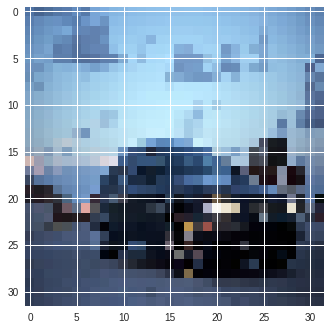

1/1 [==============================] - 0s 8ms/step
airplane = 0
automobile = 100
bird = 0
cat = 0
deer = 0
dog = 0
forg = 0
horse = 0
ship = 0
truck = 0
---
予測した結果= automobile


In [0]:
# OpenCVを使って画像を読み込む
im = cv2.imread('test-car.jpg')

# 色空間を変換してリサイズ
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.resize(im, (32, 32))
plt.imshow(im)
plt.show()

# 予測する
r = model.predict(np.array([im]), batch_size=32, verbose=1)
res = r[0]

# 結果を表示する
for i, acc in enumerate(res):
  print(labels[i], "=", int(acc * 100))
print("---")  
print("予測した結果=", labels[res.argmax()])

In [0]:
from google.colab import files
uploaded = files.upload()

Saving test-cat.jpg to test-cat.jpg


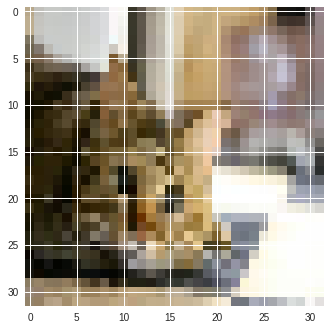

1/1 [==============================] - 0s 8ms/step
airplane = 0
automobile = 0
bird = 0
cat = 100
deer = 0
dog = 0
forg = 0
horse = 0
ship = 0
truck = 0
---
予測した結果= cat


In [0]:
# OpenCVを使って画像を読み込む
im = cv2.imread('test-cat.jpg')

# 色空間を変換してリサイズ
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.resize(im, (32, 32))
plt.imshow(im)
plt.show()

# CNNで学習した画像データに合わせる
#im = im.reshape(im_size).astype('float32') / 255
# 予測する
r = model.predict(np.array([im]), batch_size=32, verbose=1)
res = r[0]

# 結果を表示する
for i, acc in enumerate(res):
  print(labels[i], "=", int(acc * 100))
print("---")  
print("予測した結果=", labels[res.argmax()])

In [0]:
# 画像ファイルを読み込んでNumpy形式に変換
import numpy as np
from PIL import Image
import os, glob, random

outfile = "image/photos.npz" # 保存ファイル名
max_photo = 100 # 利用する写真の枚数
photo_size = 32 # 画像サイズ
x = [] # 画像データ
y = [] # ラベルデータ

def main():
  # 各画像のフォルダを読む
  glob_files("./image/sushi", 0)
  glob_files("./image/salad", 1)
  golb_files("./image/tofu", 2)
  
  # ファイルへ保存
  np.savez(outfile, x=x, y=y)
  print("保存しました:" + outfile, len(x))
  
# path 以下の画像を読み込む
def glob_files(path, label):
  files = glob.glob(path + "/*.jpg")
  random.shuffle(files)
  
  # 各ファイルを処理
  num = 0
  for f in files:
    if num >= max_photo: break
    num += 1
      
    # 画像ファイルを読む
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((photo_size, photo_size))
    img = np.asarray(img)
    x.append(img)
    y.append(label)
 
if __name__ == '__main__':
  main()

NameError: ignored